In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.1'

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression factor of 24.5, assuming the input is 784 floats ie 28x28

# this is our input placeholder

input_img = Input(shape=(784,)) #784/24.5

# "encoded" is the encoded representation of the input. This will output 32 neurons as image is compressed by 24.5

encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input

decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [ ]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [ ]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model

decoder = Model(encoded_input, decoder_layer(encoded_input))


In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')  #optimizers with momentum will do better at removing noise. expt with this

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print (x_train.shape)


(60000, 28, 28)


In [ ]:
x_train = x_train.astype('float32') / 255. #normalizing
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2750 - val_loss: 0.1909
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1710 - val_loss: 0.1530
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1438 - val_loss: 0.1333
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1284 - val_loss: 0.1211
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1181 - val_loss: 0.1128
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1111 - val_loss: 0.1071
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1062 - val_loss: 0.1029
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1025 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0998 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0979 - val_loss: 0.0958

In [ ]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

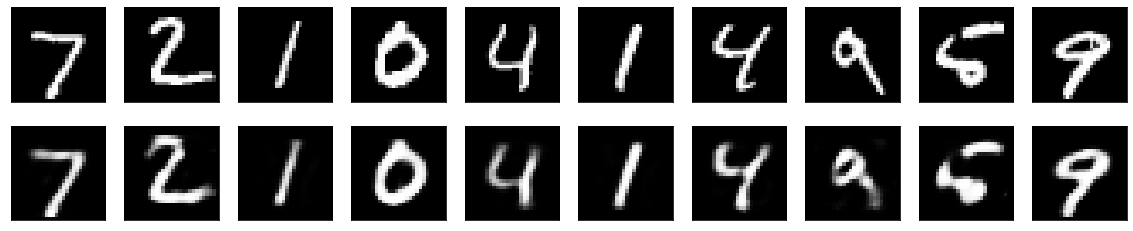

In [ ]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))

for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()